In [62]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)

In [63]:
import functions
import pandas as pd

In [64]:
df = functions.file_opener(task='2',labeler='all')
task = df.task
df = df.drop('task', axis = 1)


In [65]:
balanced = pd.DataFrame()
for i in df.label.unique():
    balanced = pd.concat([balanced, df.loc[df['label'] == float(i)].sample(min(df.label.value_counts()))])

In [66]:
labels = balanced.label.to_numpy()
balanced = balanced.drop('label', axis = 1)
functions.normalize(df)

,0,1,2,3,4,5,label
0,0.000030,0.733901,0.189411,0.566259,0.188208,0.539413,0.0
1,0.000072,0.853151,0.189406,0.566265,0.186040,0.547452,0.0
2,0.000089,0.766509,0.189400,0.566271,0.184139,0.554615,0.0
3,0.000107,0.726782,0.189395,0.566277,0.182504,0.560934,0.0
4,0.000105,0.818264,0.189390,0.566283,0.181135,0.566440,0.0
...,...,...,...,...,...,...,...
10512,0.000198,0.744103,0.189470,0.566452,0.500894,0.630330,0.5
10513,0.000357,0.771607,0.189456,0.566438,0.500887,0.641935,0.5
10514,0.000224,0.751594,0.189439,0.566421,0.500869,0.653895,0.5
10515,0.000262,0.743195,0.189419,0.566403,0.500838,0.666199,0.5


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced, labels, test_size=0.7, random_state=42)

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_train)

In [69]:
predicted = kmeans.predict(X_test)

In [70]:
from tabulate import tabulate
cluster_numbers = [10]

clusters={}
for cluster_number in cluster_numbers:
    for i in range(0, cluster_number):
        clusters[i] = {0:0, 1:0, 2:0, 3:0}

for i, cluster in enumerate(predicted):
    clusters[cluster][labels[i]] += 1

table = [['cluster', 'label distribution', 'label percentage']]
print('task: %s, clusters: %i'%('2',10))
for i in clusters:
    perc = round(100* (max(clusters[i].values())/ sum(clusters[i].values())))
    if (max(clusters[i].values()) > 50):
        table.append([i, clusters[i], str(perc)+ '%'])
print(tabulate(table, tablefmt='fancy_grid'))

task: 2, clusters: 10
╒═════════╤══════════════════════════════════╤══════════════════╕
│ cluster │ label distribution               │ label percentage │
├─────────┼──────────────────────────────────┼──────────────────┤
│ 0       │ {0: 1912, 1: 194, 2: 1894, 3: 0} │ 48%              │
├─────────┼──────────────────────────────────┼──────────────────┤
│ 1       │ {0: 942, 1: 89, 2: 921, 3: 0}    │ 48%              │
├─────────┼──────────────────────────────────┼──────────────────┤
│ 2       │ {0: 935, 1: 94, 2: 1001, 3: 0}   │ 49%              │
├─────────┼──────────────────────────────────┼──────────────────┤
│ 3       │ {0: 1386, 1: 147, 2: 1443, 3: 0} │ 48%              │
├─────────┼──────────────────────────────────┼──────────────────┤
│ 7       │ {0: 74, 1: 4, 2: 73, 3: 0}       │ 49%              │
├─────────┼──────────────────────────────────┼──────────────────┤
│ 8       │ {0: 705, 1: 75, 2: 686, 3: 0}    │ 48%              │
├─────────┼──────────────────────────────────┼────────

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)

In [72]:
model = knn.fit(X_train,y_train)

In [73]:
y_pred = model.predict(X_test)

 f1:  1.0
              precision    recall  f1-score   support

         0.0       0.55      0.65      0.59      5027
         1.0       0.59      0.57      0.58      5065
         2.0       0.81      0.69      0.75      5108

    accuracy                           0.64     15200
   macro avg       0.65      0.64      0.64     15200
weighted avg       0.65      0.64      0.64     15200

0.4548969705160869


Text(0.5, 1.0, 'data distribution according to proposed dataset')

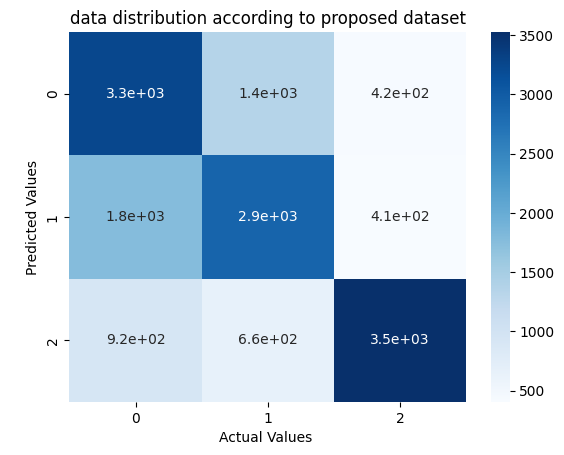

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

print(" f1: ", accuracy_score(y_test, y_test))

print(classification_report(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))
plt.clf()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ')
ax.set_title('data distribution according to proposed dataset')